In [1]:
import numpy as np
import pandas as pd
import math
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [50]:
import random
random.seed(100)

In [55]:
d = 100 #cantidad de columnas para el dataset.
n = 1000 #cantidad de observaciones para el dataset.
X = np.random.normal(0,1, size=(n,d))
beta_true = np.random.normal(0,1, size=(d,1))
y = X.dot(beta_true) + np.random.normal(0,0.5,size=(n,1))

# Part 1: Analytic Solution

In [431]:
B = np.matmul(np.matmul(LA.inv(np.matmul(np.transpose(X),X)),np.transpose(X)),y)

In [432]:
B[0:10]

array([[-0.23685871],
       [-0.53931787],
       [-0.47424303],
       [-1.11976203],
       [-0.54025815],
       [ 0.56452611],
       [ 2.05203087],
       [ 0.28320793],
       [-1.2251717 ],
       [ 0.1436874 ]])

## Part 2: Gradient Descent

In [440]:
B_0 = np.zeros(X.shape[1])
B_0 = B_0.reshape(B_0.shape[0],1)
B_0.shape

(100, 1)

In [441]:
def batch_gradient_descent(x_train,y_train,B,it_limit,tolerance,lr):
    i=0
    df = pd.DataFrame(columns=['i','error'])
    error = np.sum((np.matmul(x_train,B) - y_train)**2)
    while error > tolerance and i < it_limit:
        gradient = np.matmul(np.matmul(B.T,x_train.T)-y_train.T,x_train)
        B = B - lr/x_train.shape[1]*gradient.T
        error = np.sum((np.matmul(x_train,B) - y_train)**2)
        run = {'i':i, 'error':error}
        df = df.append(run, ignore_index=True)

        i+=1
    
    return df

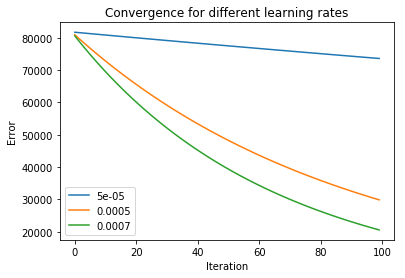

In [442]:
lrs = [0.00005, 0.0005,0.0007]
for learning_rate in lrs:
    results = batch_gradient_descent(X,y,B_0,100,100,learning_rate)
    plt.plot(results['i'],results['error'])
    plt.title("Convergence for different learning rates")
    plt.xlabel("Iteration")
    plt.ylabel("Error")

plt.legend(lrs)
plt.show()

In [537]:
def stochastic_gradient_descent(x_train,y_train,B,it_limit,tolerance,lr):
    df = pd.DataFrame(columns=['i','error'])
    
    for i in range(it_limit):
        total_error = 0
        for j in range(x_train.shape[0]):
            obs = int(np.random.randint(x_train.shape[0], size=1))
            X = x_train[obs,:].reshape(1,x_train.shape[1])
            Y = y_train[obs].reshape(1,1)
            gradient = 2*(np.matmul(X.T, np.matmul(X, B) - Y)) 

            B = B - lr*gradient
            error = np.sum((np.matmul(X,B) - Y)**2)
            total_error+=error
            
        run = {'i':i, 'error':total_error}
        df = df.append(run, ignore_index=True)

    
   
    return df

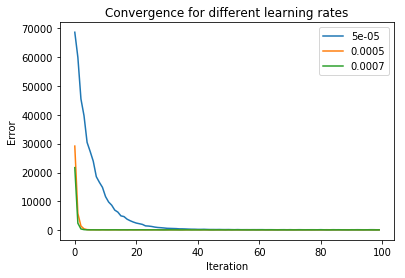

In [538]:
lrs = [0.00005, 0.0005,0.0007]
for learning_rate in lrs:
    results = stochastic_gradient_descent(X,y,B_0,100,100,learning_rate)
    plt.plot(results['i'],results['error'])
    plt.title("Convergence for different learning rates")
    plt.xlabel("Iteration")
    plt.ylabel("Error")

plt.legend(lrs)
plt.show()

In [281]:
int(np.random.randint(1000, size=1))

69

In [610]:
def mini_batch_gradient_descent(x_train,y_train,B,iterations,tolerance,lr,batch_size):
    n = x_train.shape[0]
    df = pd.DataFrame(columns=['i','error'])
    num_batches = int( n/batch_size)
    print("total de batches ",num_batches)
    
    for i in range(iterations):
        total_error = 0
        obs = np.random.randint( x_train.shape[1], size=batch_size)
        X = x_train[obs]
        Y = y_train[obs]
        for j in range(0,n,num_batches):
            X_j = X[i:i+batch_size]
            Y_j = y[i:i+batch_size]
            #print("batch: ",j," de iteracion: ", i )
            gradient = 2*(np.matmul(X_j.T, np.matmul(X_j, B) - Y_j)) 

            B = B - lr*gradient
            error = np.sum((np.matmul(X_j,B) - Y)**2)
            total_error+=error
            
            run = {'i':i, 'error':total_error}
            df = df.append(run, ignore_index=True)

        return df

    
   

In [623]:
def mini_batch_gradient_descent(x_train,y_train,B,it_limit,tolerance,lr,batch_size):
    df = pd.DataFrame(columns=['i','error'])
    n = x_train.shape[0]
    num_batches = int(n/batch_size)
    
    for i in range(it_limit):
        total_error = 0
        for j in range(num_batches):
            obs = np.random.randint(x_train.shape[0], size=batch_size)
            X = x_train[obs]
            Y = y_train[obs]
            gradient = 2*(np.matmul(X.T, np.matmul(X, B) - Y)) 

            B = B - lr*gradient
            error = np.sum((np.matmul(X,B) - Y)**2)
            total_error+=error
            #print("iteracion: ",i,"batch : ",j, "error :",error)
        run = {'i':i, 'error':total_error}
        df = df.append(run, ignore_index=True)

    
   
    return df

In [628]:
mini_batch_gradient_descent(X,y,B_0,it_limit=100,tolerance=100,lr=0.001,batch_size=100)

,i,error
0,0.0,10815.141867
1,1.0,651.347239
2,2.0,201.840366
3,3.0,159.750825
4,4.0,161.114000
5,5.0,141.284114
6,6.0,153.631423
7,7.0,144.547013
8,8.0,155.173636
9,9.0,164.869057


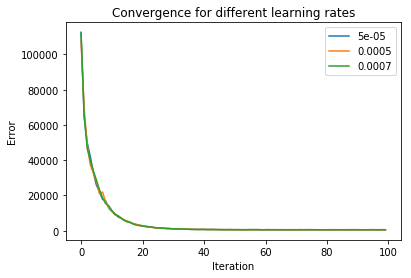

In [629]:
lrs = [0.00005, 0.0005,0.0007]
for learning_rate in lrs:
    results = mini_batch_gradient_descent(X,y,B_0,it_limit=100,tolerance=100,lr=lrs,batch_size=100)
    plt.plot(results['i'],results['error'])
    plt.title("Convergence for different learning rates")
    plt.xlabel("Iteration")
    plt.ylabel("Error")

plt.legend(lrs)
plt.show()